In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
rs_list = []
for samlen in [6,9,30,120]:
    rs_list.append(pd.read_csv(f'grid_result_{samlen}.csv',index_col=0))
grid_result = pd.concat(rs_list).reset_index(drop=True)
for index,row in grid_result.sort_values('test_acc',ascending=False)[['sample_len','p1','p2','epoch','batch_size']].iloc[:20].iterrows():
    sample_len,p1,p2,epoch,batch_size = row.to_list()
    # print(row)

In [12]:
grid_result.sort_values('test_acc',ascending=False)[['sample_len','p1','p2','epoch','batch_size']]

sample_len     p1     p2  epoch  batch_size
69          9.0  192.0  192.0   30.0       200.0
28          6.0  192.0   96.0   30.0       100.0
61          9.0  192.0   48.0   30.0       200.0
32          6.0  192.0  192.0   30.0       100.0
53          9.0   96.0   96.0   30.0       200.0
..          ...    ...    ...    ...         ...
107        15.0  192.0  192.0   60.0       200.0
135        30.0  192.0   48.0   60.0       200.0
123        30.0   96.0   48.0   60.0       200.0
94         15.0   96.0  192.0   60.0       100.0
126        30.0   96.0   96.0   60.0       100.0

[216 rows x 5 columns]

In [6]:
exp1 = pd.read_csv('exp_result2.csv',index_col=0)
exp2 = pd.read_csv('exp_result1.csv',index_col=0)
exp3 = pd.read_csv('exp_result.csv',index_col=0)
exp3.loc[exp3.index%2==1,'weighted'] = False
exp4 = pd.read_csv('exp_result3.csv',index_col=0)
exp4.loc[exp3.index%2==1,'weighted'] = False
top_30 = pd.concat([exp1,exp2,exp3,exp4])

In [ ]:
    adj = part[1][['pre_adj_1','after_adj_1','after_adj_2','after_adj_3']].mean()
    dd = part[1][['pre_dd_1','after_dd_1','after_dd_2','after_dd_3']].mean()
    ar = part[1][['pre_ar_1','after_ar_1','after_ar_2','after_ar_3']].mean()

    plt.bar([x+0.1 for x in x_num],adj,width=0.1,label='Sharpe')
    plt.bar([x+0.1 for x in x_num],dd,width=0.1,label='Max Drawdown')
    plt.bar([x+0.1 for x in x_num],ar,width=0.1,label='Annural Rate')



    wtl = part[1][['pre_wtl_1','adj_wtl','adj_wtl_2','adj_wtl_3']].mean()
    plt.bar([x+0.25 for x in x_num],wtl,width=0.1,label='Win to Lose')


In [189]:
top_30.groupby('sample_len')[['test_acc','precision','recall','f1','wtl','sharpe','dd','ar']].mean()

test_acc  precision    recall        f1       wtl    sharpe  \
sample_len                                                                
6           0.517429   0.530401  0.785349  0.620249  1.065290  0.184003   
9           0.514571   0.533255  0.792526  0.612308  1.052524  0.155969   
60          0.515762   0.531625  0.787179  0.616146  1.010421 -0.063706   
120         0.525667   0.532211  0.854841  0.652224  1.072508  0.213827   

                   dd        ar  
sample_len                       
6           24.305506  1.415190  
9           27.596205 -0.510836  
60          28.638504 -1.346550  
120         28.201166  1.799373

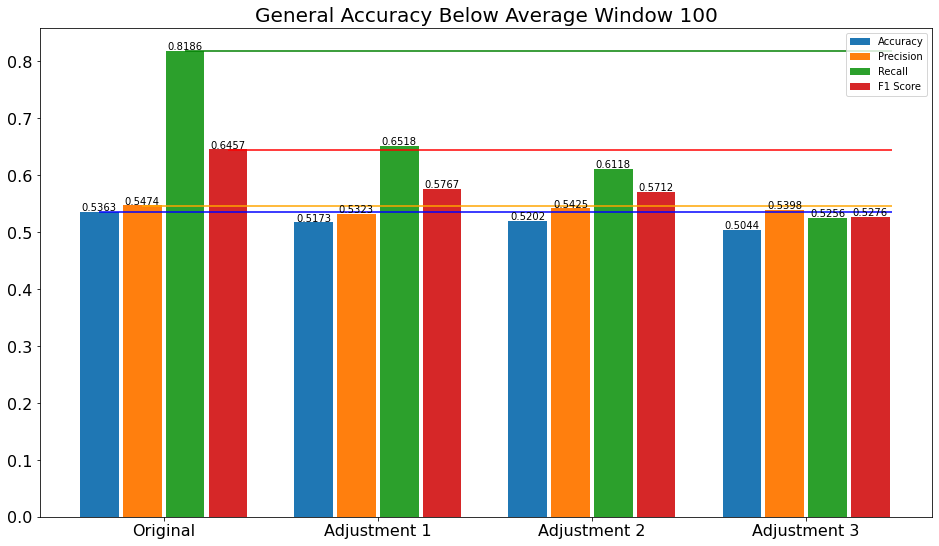

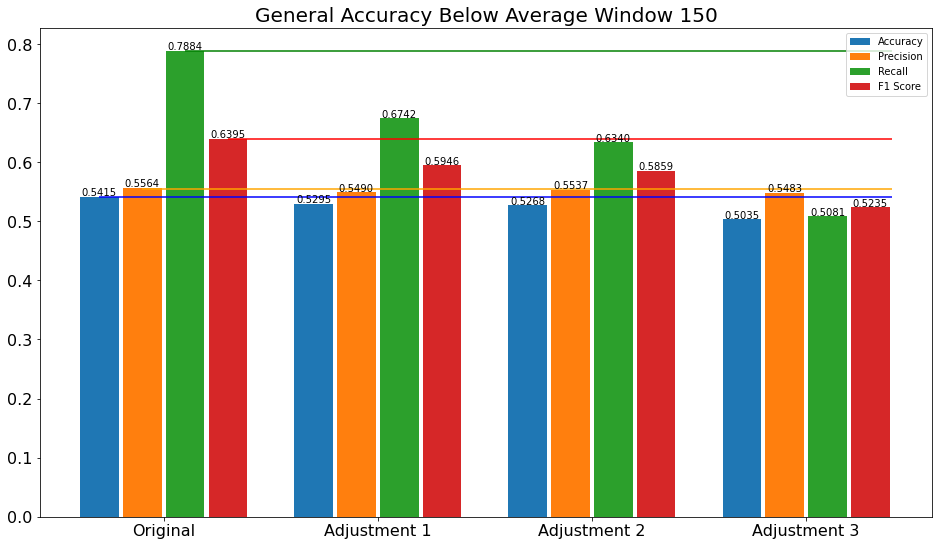

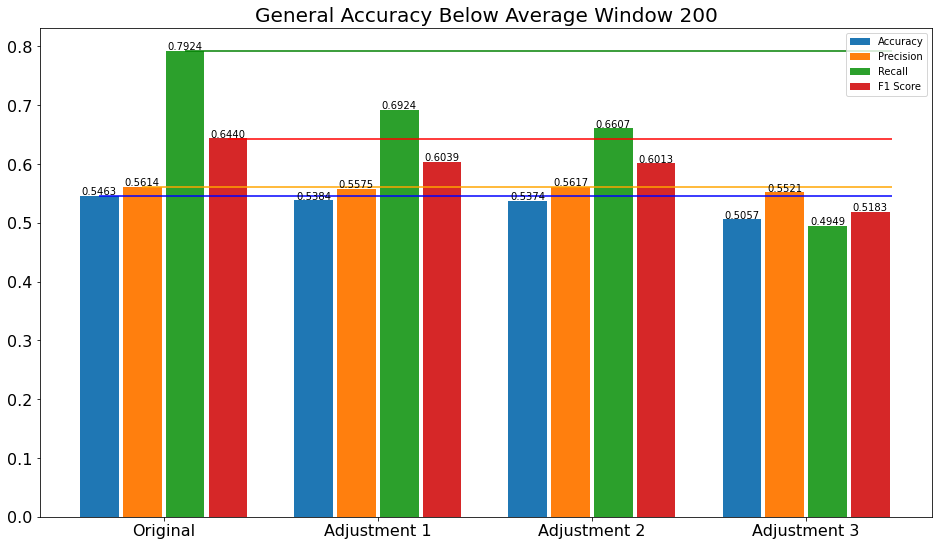

In [192]:
for part in top_30[(top_30['weighted']==True)&(top_30['pre_acc_1']>0.5)].groupby('fit_window'):
    plt.figure(figsize=(16,9))
    x_num = [0,1,2,3]
    # print(part[1][['pre_acc_1','after_acc_1','after_acc_2','after_acc_3']].mean())
    acc = part[1][['pre_acc_1','after_acc_1','after_acc_2','after_acc_3']].mean()
    pre = part[1][['pre_pre_1','after_pre_1','after_pre_2','after_pre_3']].mean()
    rec = part[1][['pre_rec_1','after_rec_1','after_rec_2','after_rec_3']].mean()
    f1 = part[1][['pre_f1_1','after_f1_1','after_f1_2','after_f1_3']].mean()

    plt.hlines(acc[0]-0.001,-0.3,3.4,colors='b')
    plt.hlines(pre[0]-0.001,-0.1,3.4,colors='orange')
    plt.hlines(rec[0]-0.001,0.1,3.4,colors='g')
    plt.hlines(f1[0]-0.001,0.3,3.4,colors='r')
    plt.bar([x-0.3 for x in x_num],acc,width=0.18,label='Accuracy')
    for x,y,z in zip([x-0.3 for x in x_num],[x+0.002 for x in acc],[f'{x:.4f}' for x in acc]):
        plt.text(x,y,z,ha='center')
    plt.bar([x-0.1 for x in x_num],pre,width=0.18,label='Precision')
    for x,y,z in zip([x-0.1 for x in x_num],[x+0.002 for x in pre],[f'{x:.4f}' for x in pre]):
        plt.text(x,y,z,ha='center')
    plt.bar([x+0.1 for x in x_num],rec,width=0.18,label='Recall')
    for x,y,z in zip([x+0.1 for x in x_num],[x+0.002 for x in rec],[f'{x:.4f}' for x in rec]):
        plt.text(x,y,z,ha='center')
    plt.bar([x+0.3 for x in x_num],f1,width=0.18,label='F1 Score')
    for x,y,z in zip([x+0.3 for x in x_num],[x+0.002 for x in f1],[f'{x:.4f}' for x in f1]):
        plt.text(x,y,z,ha='center')
    plt.tick_params(labelsize=16)
    plt.xticks(x_num,['Original','Adjustment 1','Adjustment 2','Adjustment 3'],fontsize=16)
    plt.title(f'General Accuracy Below Average Window {part[0]}',fontsize=20)
    plt.legend()
    plt.show()


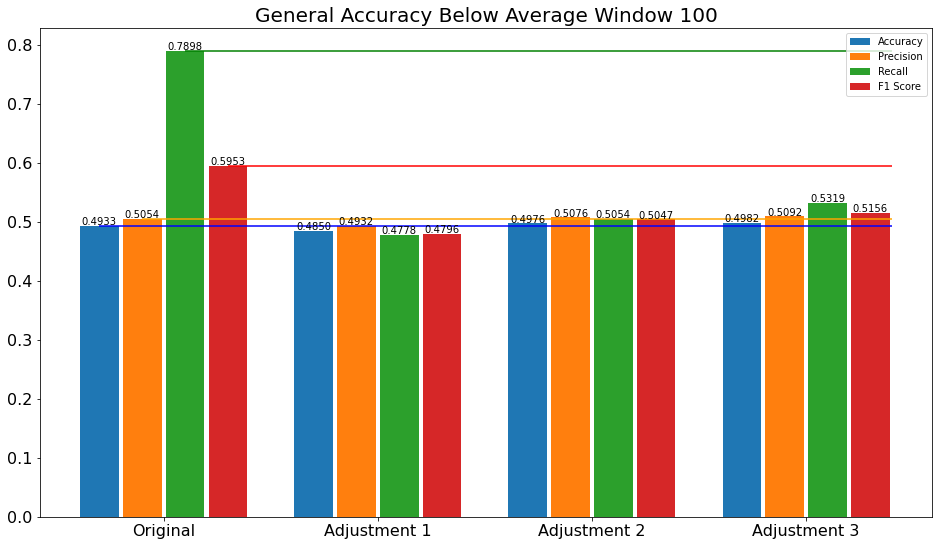

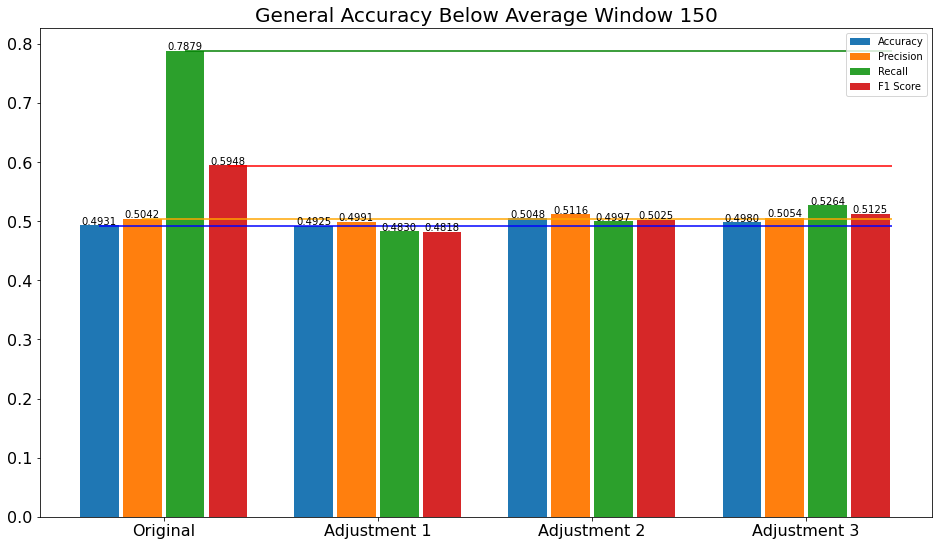

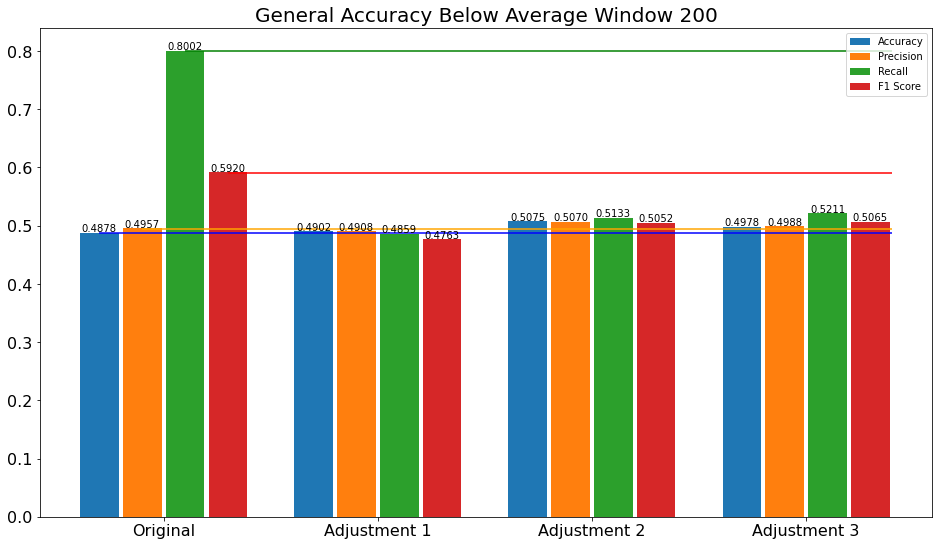

In [190]:
for part in top_30[(top_30['weighted']==True)&(top_30['pre_acc_1']<top_30['pre_acc_1'].mean())].groupby('fit_window'):
    plt.figure(figsize=(16,9))
    x_num = [0,1,2,3]
    # print(part[1][['pre_acc_1','after_acc_1','after_acc_2','after_acc_3']].mean())
    acc = part[1][['pre_acc_1','after_acc_1','after_acc_2','after_acc_3']].mean()
    pre = part[1][['pre_pre_1','after_pre_1','after_pre_2','after_pre_3']].mean()
    rec = part[1][['pre_rec_1','after_rec_1','after_rec_2','after_rec_3']].mean()
    f1 = part[1][['pre_f1_1','after_f1_1','after_f1_2','after_f1_3']].mean()

    plt.hlines(acc[0]-0.001,-0.3,3.4,colors='b')
    plt.hlines(pre[0]-0.001,-0.1,3.4,colors='orange')
    plt.hlines(rec[0]-0.001,0.1,3.4,colors='g')
    plt.hlines(f1[0]-0.001,0.3,3.4,colors='r')
    plt.bar([x-0.3 for x in x_num],acc,width=0.18,label='Accuracy')
    for x,y,z in zip([x-0.3 for x in x_num],[x+0.002 for x in acc],[f'{x:.4f}' for x in acc]):
        plt.text(x,y,z,ha='center')
    plt.bar([x-0.1 for x in x_num],pre,width=0.18,label='Precision')
    for x,y,z in zip([x-0.1 for x in x_num],[x+0.002 for x in pre],[f'{x:.4f}' for x in pre]):
        plt.text(x,y,z,ha='center')
    plt.bar([x+0.1 for x in x_num],rec,width=0.18,label='Recall')
    for x,y,z in zip([x+0.1 for x in x_num],[x+0.002 for x in rec],[f'{x:.4f}' for x in rec]):
        plt.text(x,y,z,ha='center')
    plt.bar([x+0.3 for x in x_num],f1,width=0.18,label='F1 Score')
    for x,y,z in zip([x+0.3 for x in x_num],[x+0.002 for x in f1],[f'{x:.4f}' for x in f1]):
        plt.text(x,y,z,ha='center')
    plt.tick_params(labelsize=16)
    plt.xticks(x_num,['Original','Adjustment 1','Adjustment 2','Adjustment 3'],fontsize=16)
    plt.title(f'General Accuracy Below Average Window {part[0]}',fontsize=20)
    plt.legend()
    plt.show()


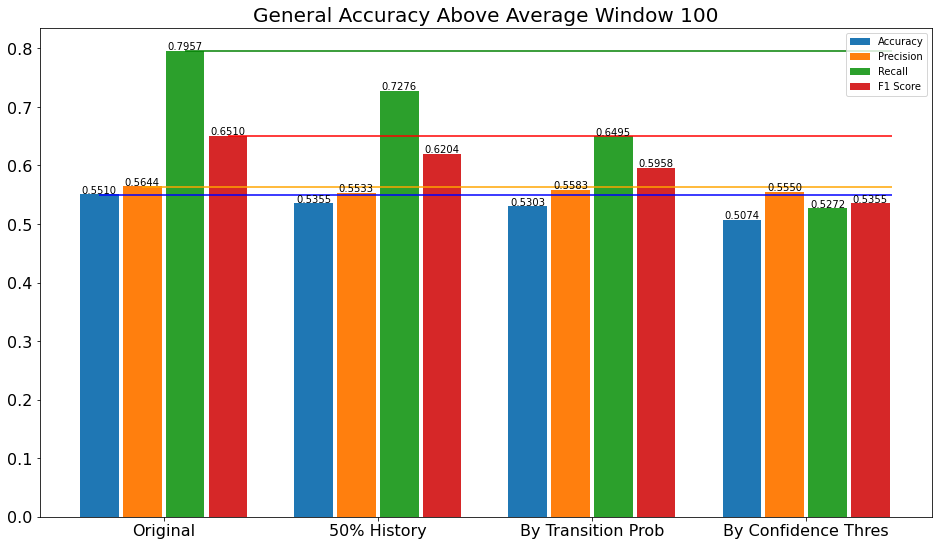

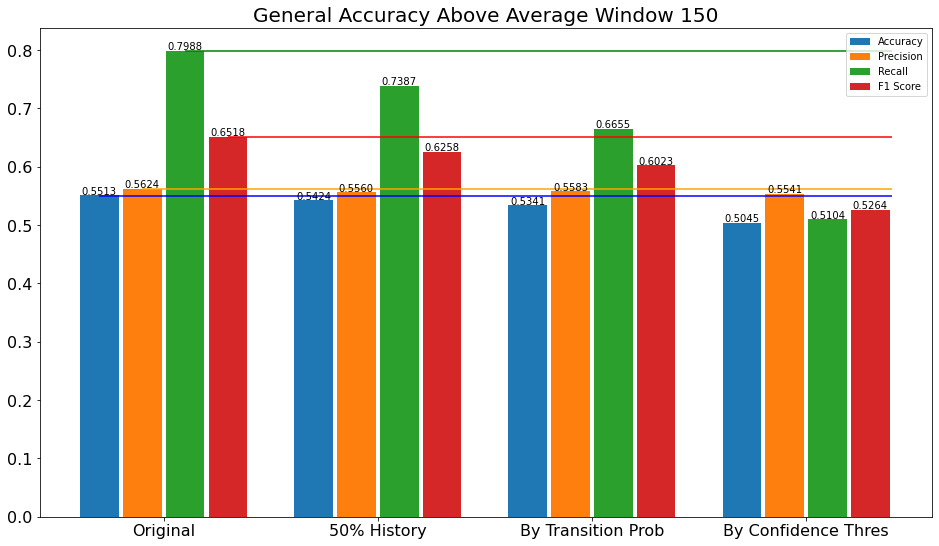

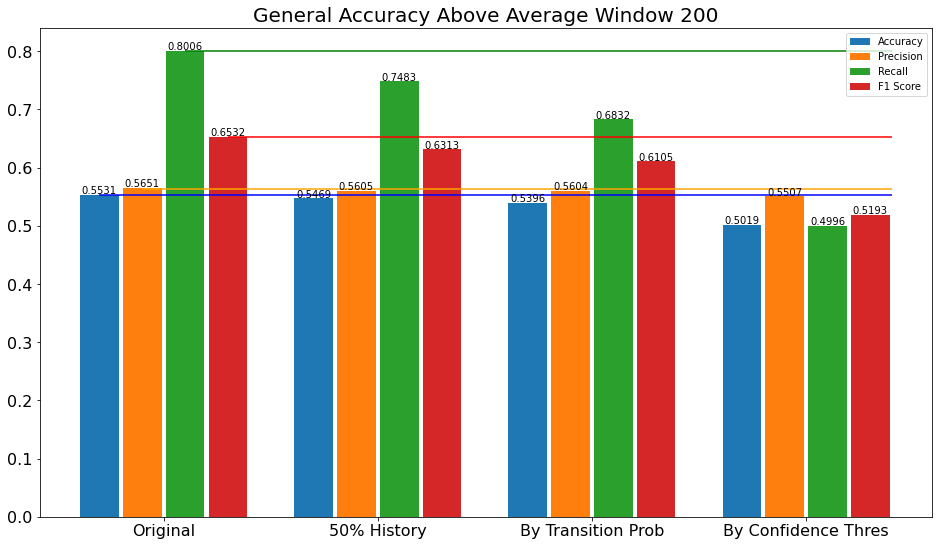

In [150]:
for part in top_30[(top_30['weighted']==True)&(top_30['test_acc']>top_30['test_acc'].mean())].groupby('fit_window'):
    plt.figure(figsize=(16,9))
    x_num = [0,1,2,3]
    # print(part[1][['pre_acc_1','after_acc_1','after_acc_2','after_acc_3']].mean())
    acc = part[1][['pre_acc_1','after_acc_1','after_acc_2','after_acc_3']].mean()
    pre = part[1][['pre_pre_1','after_pre_1','after_pre_2','after_pre_3']].mean()
    rec = part[1][['pre_rec_1','after_rec_1','after_rec_2','after_rec_3']].mean()
    f1 = part[1][['pre_f1_1','after_f1_1','after_f1_2','after_f1_3']].mean()

    plt.hlines(acc[0]-0.001,-0.3,3.4,colors='b')
    plt.hlines(pre[0]-0.001,-0.1,3.4,colors='orange')
    plt.hlines(rec[0]-0.001,0.1,3.4,colors='g')
    plt.hlines(f1[0]-0.001,0.3,3.4,colors='r')
    plt.bar([x-0.3 for x in x_num],acc,width=0.18,label='Accuracy')
    for x,y,z in zip([x-0.3 for x in x_num],[x+0.002 for x in acc],[f'{x:.4f}' for x in acc]):
        plt.text(x,y,z,ha='center')
    plt.bar([x-0.1 for x in x_num],pre,width=0.18,label='Precision')
    for x,y,z in zip([x-0.1 for x in x_num],[x+0.002 for x in pre],[f'{x:.4f}' for x in pre]):
        plt.text(x,y,z,ha='center')
    plt.bar([x+0.1 for x in x_num],rec,width=0.18,label='Recall')
    for x,y,z in zip([x+0.1 for x in x_num],[x+0.002 for x in rec],[f'{x:.4f}' for x in rec]):
        plt.text(x,y,z,ha='center')
    plt.bar([x+0.3 for x in x_num],f1,width=0.18,label='F1 Score')
    for x,y,z in zip([x+0.3 for x in x_num],[x+0.002 for x in f1],[f'{x:.4f}' for x in f1]):
        plt.text(x,y,z,ha='center')
    plt.tick_params(labelsize=16)
    plt.xticks(x_num,['Original','Adjustment 1','Adjustment 2','Adjustment 3'],fontsize=16)
    plt.title(f'General Accuracy Above Average Window {part[0]}',fontsize=20)
    plt.legend()
    plt.show()


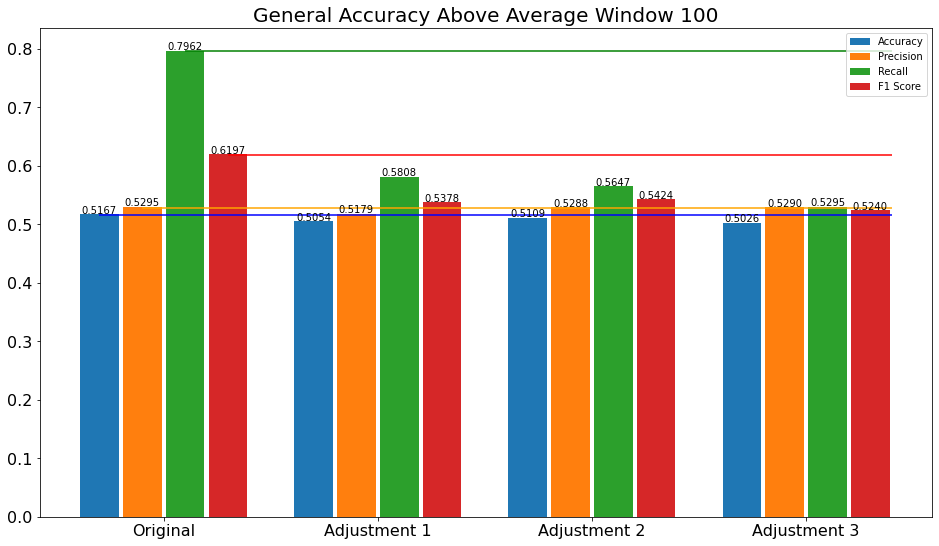

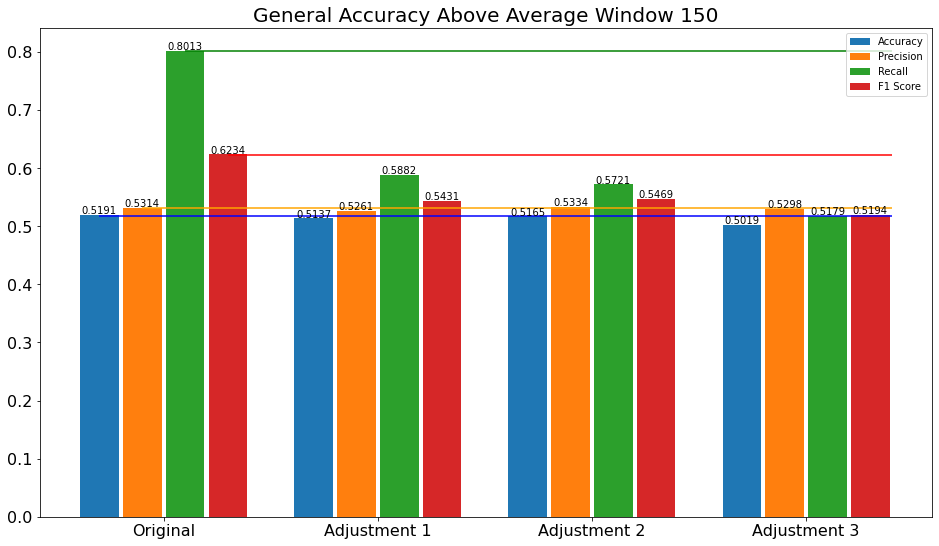

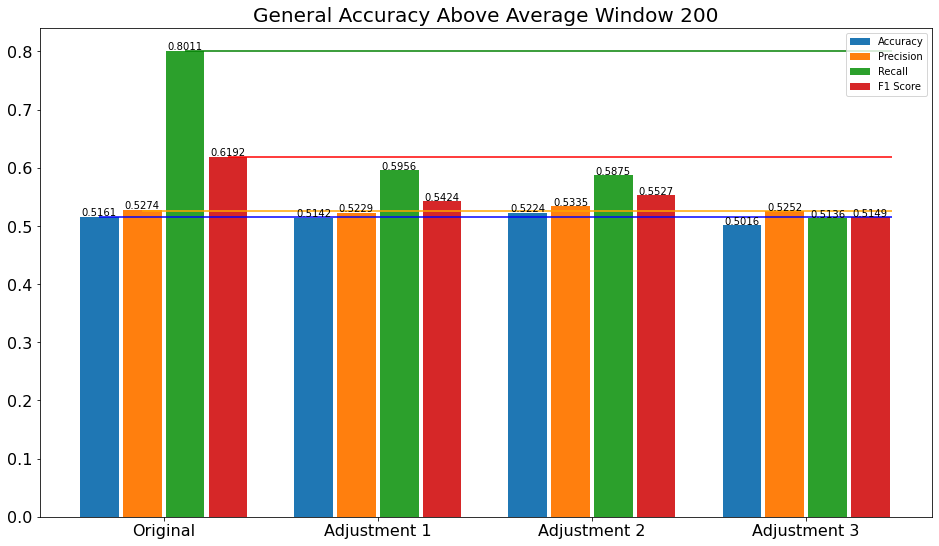

In [170]:
for part in top_30[(top_30['weighted']==True)].groupby('fit_window'):
    plt.figure(figsize=(16,9))
    x_num = [0,1,2,3]
    # print(part[1][['pre_acc_1','after_acc_1','after_acc_2','after_acc_3']].mean())
    acc = part[1][['pre_acc_1','after_acc_1','after_acc_2','after_acc_3']].mean()
    pre = part[1][['pre_pre_1','after_pre_1','after_pre_2','after_pre_3']].mean()
    rec = part[1][['pre_rec_1','after_rec_1','after_rec_2','after_rec_3']].mean()
    f1 = part[1][['pre_f1_1','after_f1_1','after_f1_2','after_f1_3']].mean()

    plt.hlines(acc[0]-0.001,-0.3,3.4,colors='b')
    plt.hlines(pre[0]-0.001,-0.1,3.4,colors='orange')
    plt.hlines(rec[0]-0.001,0.1,3.4,colors='g')
    plt.hlines(f1[0]-0.001,0.3,3.4,colors='r')
    plt.bar([x-0.3 for x in x_num],acc,width=0.18,label='Accuracy')
    for x,y,z in zip([x-0.3 for x in x_num],[x+0.002 for x in acc],[f'{x:.4f}' for x in acc]):
        plt.text(x,y,z,ha='center')
    plt.bar([x-0.1 for x in x_num],pre,width=0.18,label='Precision')
    for x,y,z in zip([x-0.1 for x in x_num],[x+0.002 for x in pre],[f'{x:.4f}' for x in pre]):
        plt.text(x,y,z,ha='center')
    plt.bar([x+0.1 for x in x_num],rec,width=0.18,label='Recall')
    for x,y,z in zip([x+0.1 for x in x_num],[x+0.002 for x in rec],[f'{x:.4f}' for x in rec]):
        plt.text(x,y,z,ha='center')
    plt.bar([x+0.3 for x in x_num],f1,width=0.18,label='F1 Score')
    for x,y,z in zip([x+0.3 for x in x_num],[x+0.002 for x in f1],[f'{x:.4f}' for x in f1]):
        plt.text(x,y,z,ha='center')
    plt.tick_params(labelsize=16)
    plt.xticks(x_num,['Original','Adjustment 1','Adjustment 2','Adjustment 3'],fontsize=16)
    plt.title(f'General Accuracy Above Average Window {part[0]}',fontsize=20)
    plt.legend()
    plt.show()


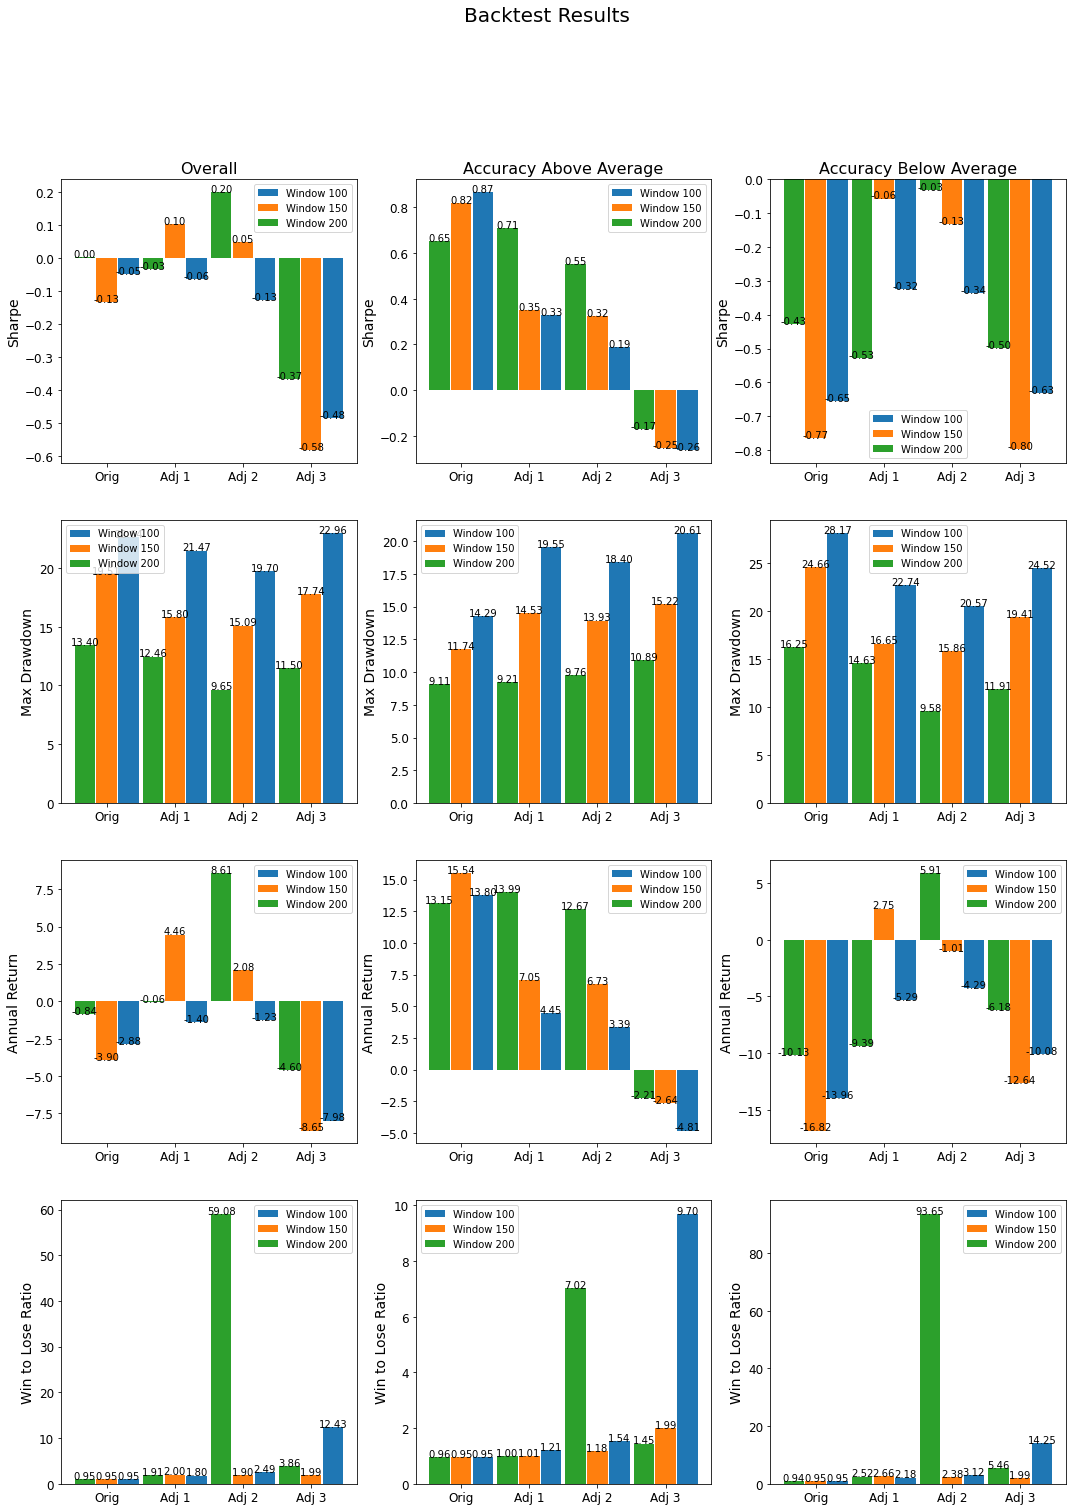

In [187]:
plt.figure(figsize=(18,24))
plt.suptitle(f'Backtest Results',fontsize=20)
i = -1
tick_num = [0,1,2,3]
for part in top_30[(top_30['weighted']==True)].groupby('fit_window'):    
    x_num = [x-i*0.32 for x in [0,1,2,3]]
    adj = part[1][['pre_adj_1','after_adj_1','after_adj_2','after_adj_3']].mean()
    dd = part[1][['pre_dd_1','after_dd_1','after_dd_2','after_dd_3']].mean()
    ar = part[1][['pre_ar_1','after_ar_1','after_ar_2','after_ar_3']].mean()
    wtl = part[1][['pre_wtl_1','adj_wtl','adj_wtl_2','adj_wtl_3']].mean()

    plt.subplot(4,3,1)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,adj,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,adj,[f'{x:.2f}' for x in adj]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    plt.title('Overall',fontsize=16)
    plt.ylabel('Sharpe',fontsize=14)
    plt.legend()

    plt.subplot(4,3,4)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,dd,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,dd,[f'{x:.2f}' for x in dd]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Max Drawdown',fontsize=16)
    plt.ylabel('Max Drawdown',fontsize=14)
    plt.legend()

    plt.subplot(4,3,7)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,ar,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,ar,[f'{x:.2f}' for x in ar]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Annual Return',fontsize=16)
    plt.ylabel('Annual Return',fontsize=14)
    plt.legend()

    plt.subplot(4,3,10)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,wtl,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,wtl,[f'{x:.2f}' for x in wtl]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Win to Lose Ratio',fontsize=16)
    plt.ylabel('Win to Lose Ratio',fontsize=14)
    plt.legend()
    i += 1
i = -1
for part in top_30[(top_30['weighted']==True)&(top_30['test_acc']>top_30['test_acc'].mean())].groupby('fit_window'):    
    x_num = [x-i*0.32 for x in [0,1,2,3]]
    adj = part[1][['pre_adj_1','after_adj_1','after_adj_2','after_adj_3']].mean()
    dd = part[1][['pre_dd_1','after_dd_1','after_dd_2','after_dd_3']].mean()
    ar = part[1][['pre_ar_1','after_ar_1','after_ar_2','after_ar_3']].mean()
    wtl = part[1][['pre_wtl_1','adj_wtl','adj_wtl_2','adj_wtl_3']].mean()

    plt.subplot(4,3,2)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,adj,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,adj,[f'{x:.2f}' for x in adj]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    plt.title('Accuracy Above Average',fontsize=16)
    plt.ylabel('Sharpe',fontsize=14)
    plt.legend()

    plt.subplot(4,3,5)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,dd,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,dd,[f'{x:.2f}' for x in dd]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Max Drawdown',fontsize=16)
    plt.ylabel('Max Drawdown',fontsize=14)
    plt.legend()

    plt.subplot(4,3,8)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,ar,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,ar,[f'{x:.2f}' for x in ar]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Annual Return',fontsize=16)
    plt.ylabel('Annual Return',fontsize=14)
    plt.legend()

    plt.subplot(4,3,11)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,wtl,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,wtl,[f'{x:.2f}' for x in wtl]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Win to Lose Ratio',fontsize=16)
    plt.ylabel('Win to Lose Ratio',fontsize=14)
    plt.legend()
    i += 1

i = -1
for part in top_30[(top_30['weighted']==True)&(top_30['test_acc']<top_30['test_acc'].mean())].groupby('fit_window'):    
    x_num = [x-i*0.32 for x in [0,1,2,3]]
    adj = part[1][['pre_adj_1','after_adj_1','after_adj_2','after_adj_3']].mean()
    dd = part[1][['pre_dd_1','after_dd_1','after_dd_2','after_dd_3']].mean()
    ar = part[1][['pre_ar_1','after_ar_1','after_ar_2','after_ar_3']].mean()
    wtl = part[1][['pre_wtl_1','adj_wtl','adj_wtl_2','adj_wtl_3']].mean()

    plt.subplot(4,3,3)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,adj,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,adj,[f'{x:.2f}' for x in adj]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    plt.title('Accuracy Below Average',fontsize=16)
    plt.ylabel('Sharpe',fontsize=14)
    plt.legend()

    plt.subplot(4,3,6)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,dd,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,dd,[f'{x:.2f}' for x in dd]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    plt.ylabel('Max Drawdown',fontsize=14)
    # plt.title('Max Drawdown',fontsize=16)
    plt.legend()

    plt.subplot(4,3,9)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,ar,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,ar,[f'{x:.2f}' for x in ar]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Annual Return',fontsize=16)
    plt.ylabel('Annual Return',fontsize=14)
    plt.legend()

    plt.subplot(4,3,12)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,wtl,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,wtl,[f'{x:.2f}' for x in wtl]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Win to Lose Ratio',fontsize=16)
    plt.ylabel('Win to Lose Ratio',fontsize=14)
    plt.legend()
    i += 1
plt.show()

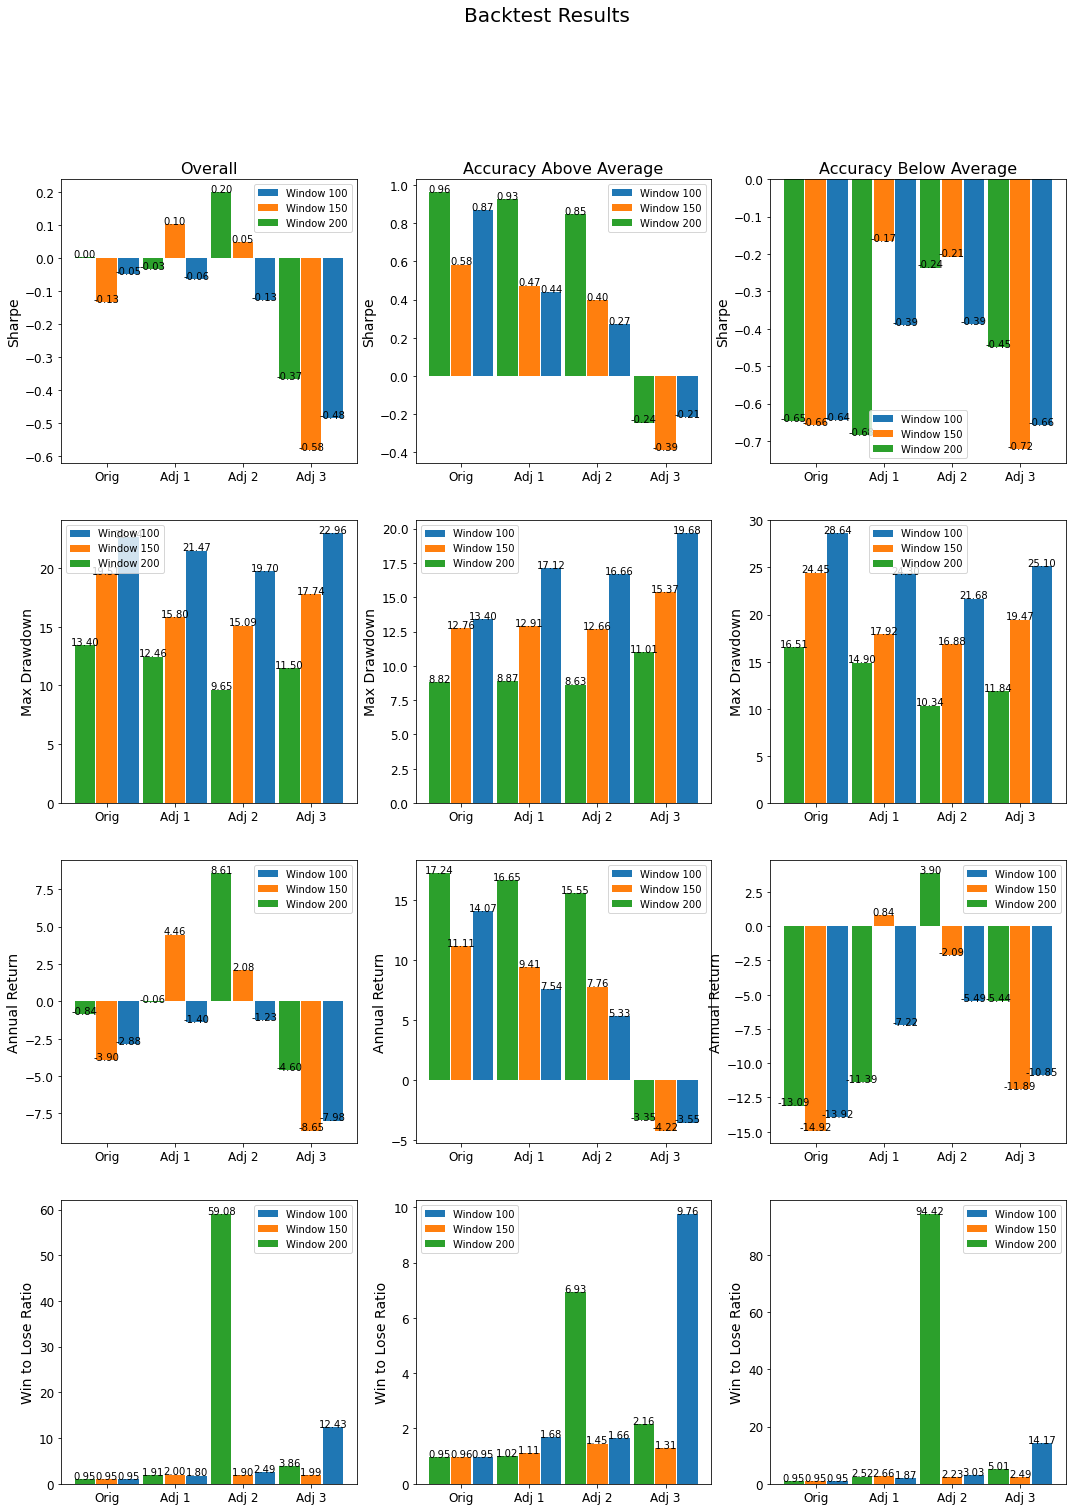

In [193]:
plt.figure(figsize=(18,24))
plt.suptitle(f'Backtest Results',fontsize=20)
i = -1
tick_num = [0,1,2,3]
for part in top_30[(top_30['weighted']==True)].groupby('fit_window'):    
    x_num = [x-i*0.32 for x in [0,1,2,3]]
    adj = part[1][['pre_adj_1','after_adj_1','after_adj_2','after_adj_3']].mean()
    dd = part[1][['pre_dd_1','after_dd_1','after_dd_2','after_dd_3']].mean()
    ar = part[1][['pre_ar_1','after_ar_1','after_ar_2','after_ar_3']].mean()
    wtl = part[1][['pre_wtl_1','adj_wtl','adj_wtl_2','adj_wtl_3']].mean()

    plt.subplot(4,3,1)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,adj,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,adj,[f'{x:.2f}' for x in adj]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    plt.title('Overall',fontsize=16)
    plt.ylabel('Sharpe',fontsize=14)
    plt.legend()

    plt.subplot(4,3,4)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,dd,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,dd,[f'{x:.2f}' for x in dd]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Max Drawdown',fontsize=16)
    plt.ylabel('Max Drawdown',fontsize=14)
    plt.legend()

    plt.subplot(4,3,7)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,ar,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,ar,[f'{x:.2f}' for x in ar]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Annual Return',fontsize=16)
    plt.ylabel('Annual Return',fontsize=14)
    plt.legend()

    plt.subplot(4,3,10)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,wtl,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,wtl,[f'{x:.2f}' for x in wtl]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Win to Lose Ratio',fontsize=16)
    plt.ylabel('Win to Lose Ratio',fontsize=14)
    plt.legend()
    i += 1
i = -1
for part in top_30[(top_30['weighted']==True)&(top_30['pre_acc_1']>top_30['pre_acc_1'].mean())].groupby('fit_window'):    
    x_num = [x-i*0.32 for x in [0,1,2,3]]
    adj = part[1][['pre_adj_1','after_adj_1','after_adj_2','after_adj_3']].mean()
    dd = part[1][['pre_dd_1','after_dd_1','after_dd_2','after_dd_3']].mean()
    ar = part[1][['pre_ar_1','after_ar_1','after_ar_2','after_ar_3']].mean()
    wtl = part[1][['pre_wtl_1','adj_wtl','adj_wtl_2','adj_wtl_3']].mean()

    plt.subplot(4,3,2)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,adj,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,adj,[f'{x:.2f}' for x in adj]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    plt.title('Accuracy Above Average',fontsize=16)
    plt.ylabel('Sharpe',fontsize=14)
    plt.legend()

    plt.subplot(4,3,5)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,dd,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,dd,[f'{x:.2f}' for x in dd]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Max Drawdown',fontsize=16)
    plt.ylabel('Max Drawdown',fontsize=14)
    plt.legend()

    plt.subplot(4,3,8)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,ar,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,ar,[f'{x:.2f}' for x in ar]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Annual Return',fontsize=16)
    plt.ylabel('Annual Return',fontsize=14)
    plt.legend()

    plt.subplot(4,3,11)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,wtl,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,wtl,[f'{x:.2f}' for x in wtl]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Win to Lose Ratio',fontsize=16)
    plt.ylabel('Win to Lose Ratio',fontsize=14)
    plt.legend()
    i += 1

i = -1
for part in top_30[(top_30['weighted']==True)&(top_30['pre_acc_1']<top_30['pre_acc_1'].mean())].groupby('fit_window'):    
    x_num = [x-i*0.32 for x in [0,1,2,3]]
    adj = part[1][['pre_adj_1','after_adj_1','after_adj_2','after_adj_3']].mean()
    dd = part[1][['pre_dd_1','after_dd_1','after_dd_2','after_dd_3']].mean()
    ar = part[1][['pre_ar_1','after_ar_1','after_ar_2','after_ar_3']].mean()
    wtl = part[1][['pre_wtl_1','adj_wtl','adj_wtl_2','adj_wtl_3']].mean()

    plt.subplot(4,3,3)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,adj,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,adj,[f'{x:.2f}' for x in adj]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    plt.title('Accuracy Below Average',fontsize=16)
    plt.ylabel('Sharpe',fontsize=14)
    plt.legend()

    plt.subplot(4,3,6)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,dd,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,dd,[f'{x:.2f}' for x in dd]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    plt.ylabel('Max Drawdown',fontsize=14)
    # plt.title('Max Drawdown',fontsize=16)
    plt.legend()

    plt.subplot(4,3,9)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,ar,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,ar,[f'{x:.2f}' for x in ar]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Annual Return',fontsize=16)
    plt.ylabel('Annual Return',fontsize=14)
    plt.legend()

    plt.subplot(4,3,12)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,wtl,width=0.3,label=f'Window {part[0]}')
    for x,y,z in zip(x_num,wtl,[f'{x:.2f}' for x in wtl]):
        plt.text(x,y,z,ha='center')
    plt.xticks(tick_num,['Orig','Adj 1','Adj 2','Adj 3'],fontsize=12)
    # plt.title('Win to Lose Ratio',fontsize=16)
    plt.ylabel('Win to Lose Ratio',fontsize=14)
    plt.legend()
    i += 1
plt.show()

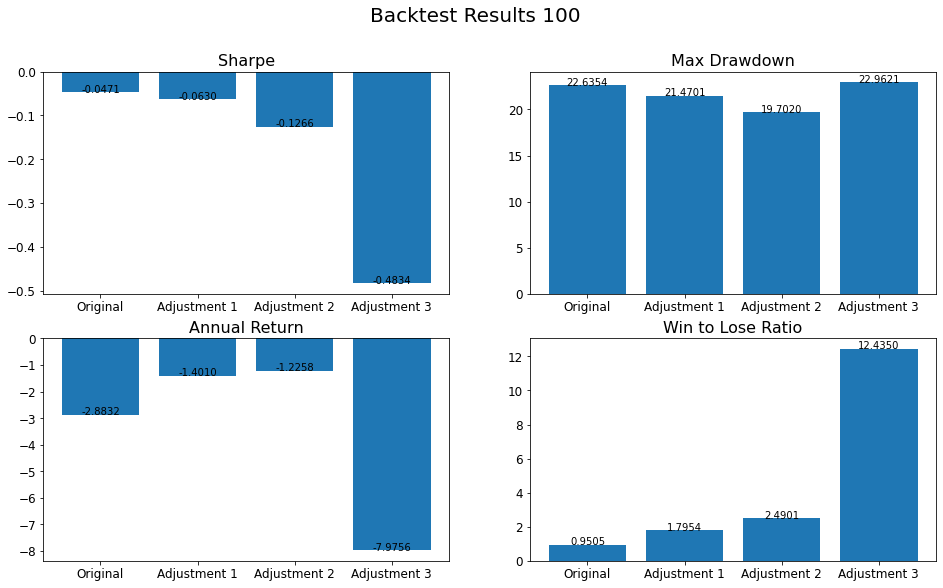

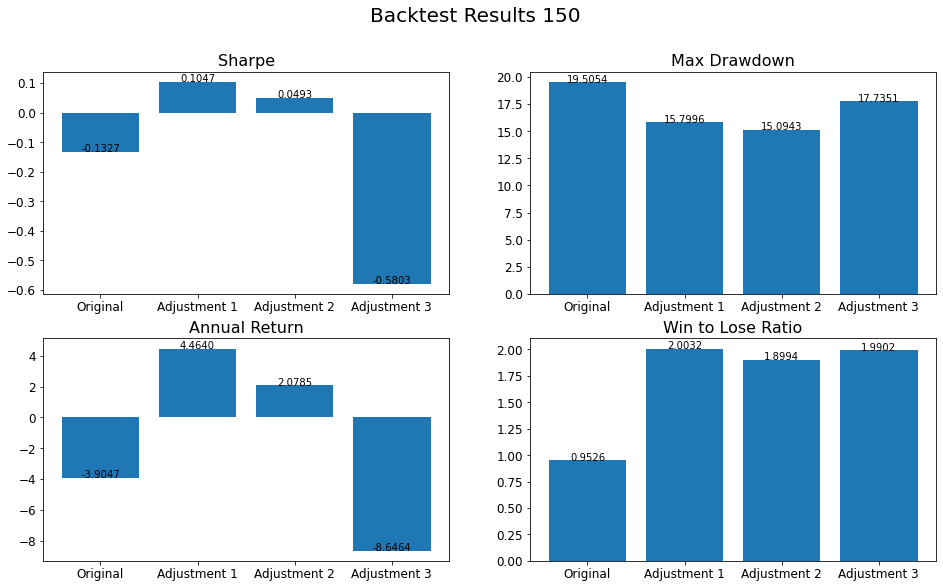

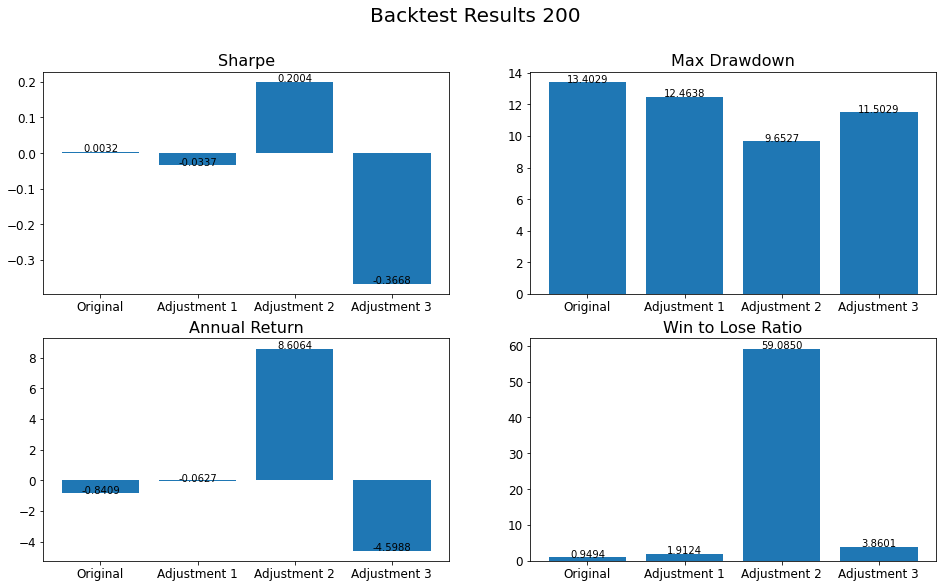

In [172]:
for part in top_30[(top_30['weighted']==True)].groupby('fit_window'):
    plt.figure(figsize=(16,9))
    
    plt.suptitle(f'Backtest Results {part[0]}',fontsize=20)
    x_num = [0,1,2,3]
    adj = part[1][['pre_adj_1','after_adj_1','after_adj_2','after_adj_3']].mean()
    dd = part[1][['pre_dd_1','after_dd_1','after_dd_2','after_dd_3']].mean()
    ar = part[1][['pre_ar_1','after_ar_1','after_ar_2','after_ar_3']].mean()
    wtl = part[1][['pre_wtl_1','adj_wtl','adj_wtl_2','adj_wtl_3']].mean()

    plt.subplot(2,2,1)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,adj,label='Sharpe')
    for x,y,z in zip(x_num,adj,[f'{x:.4f}' for x in adj]):
        plt.text(x,y,z,ha='center')
    plt.xticks(x_num,['Original','Adjustment 1','Adjustment 2','Adjustment 3'],fontsize=12)
    plt.title('Sharpe',fontsize=16)

    plt.subplot(2,2,2)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,dd,label='Max Drawdown')
    for x,y,z in zip(x_num,dd,[f'{x:.4f}' for x in dd]):
        plt.text(x,y,z,ha='center')
    plt.xticks(x_num,['Original','Adjustment 1','Adjustment 2','Adjustment 3'],fontsize=12)
    plt.title('Max Drawdown',fontsize=16)

    plt.subplot(2,2,3)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,ar,label='Annural Rate')
    for x,y,z in zip(x_num,ar,[f'{x:.4f}' for x in ar]):
        plt.text(x,y,z,ha='center')
    plt.xticks(x_num,['Original','Adjustment 1','Adjustment 2','Adjustment 3'],fontsize=12)
    plt.title('Annual Return',fontsize=16)

    plt.subplot(2,2,4)
    plt.tick_params(labelsize=12)
    plt.bar(x_num,wtl,label='Win to Lose')
    for x,y,z in zip(x_num,wtl,[f'{x:.4f}' for x in wtl]):
        plt.text(x,y,z,ha='center')
    plt.xticks(x_num,['Original','Adjustment 1','Adjustment 2','Adjustment 3'],fontsize=12)
    plt.title('Win to Lose Ratio',fontsize=16)

    plt.show()


In [77]:
group_window = top_30.groupby(['fit_window','sample_len','p1','p2','epochs','batch_size','weighted']).mean()

In [81]:
corr = group_window.corr()

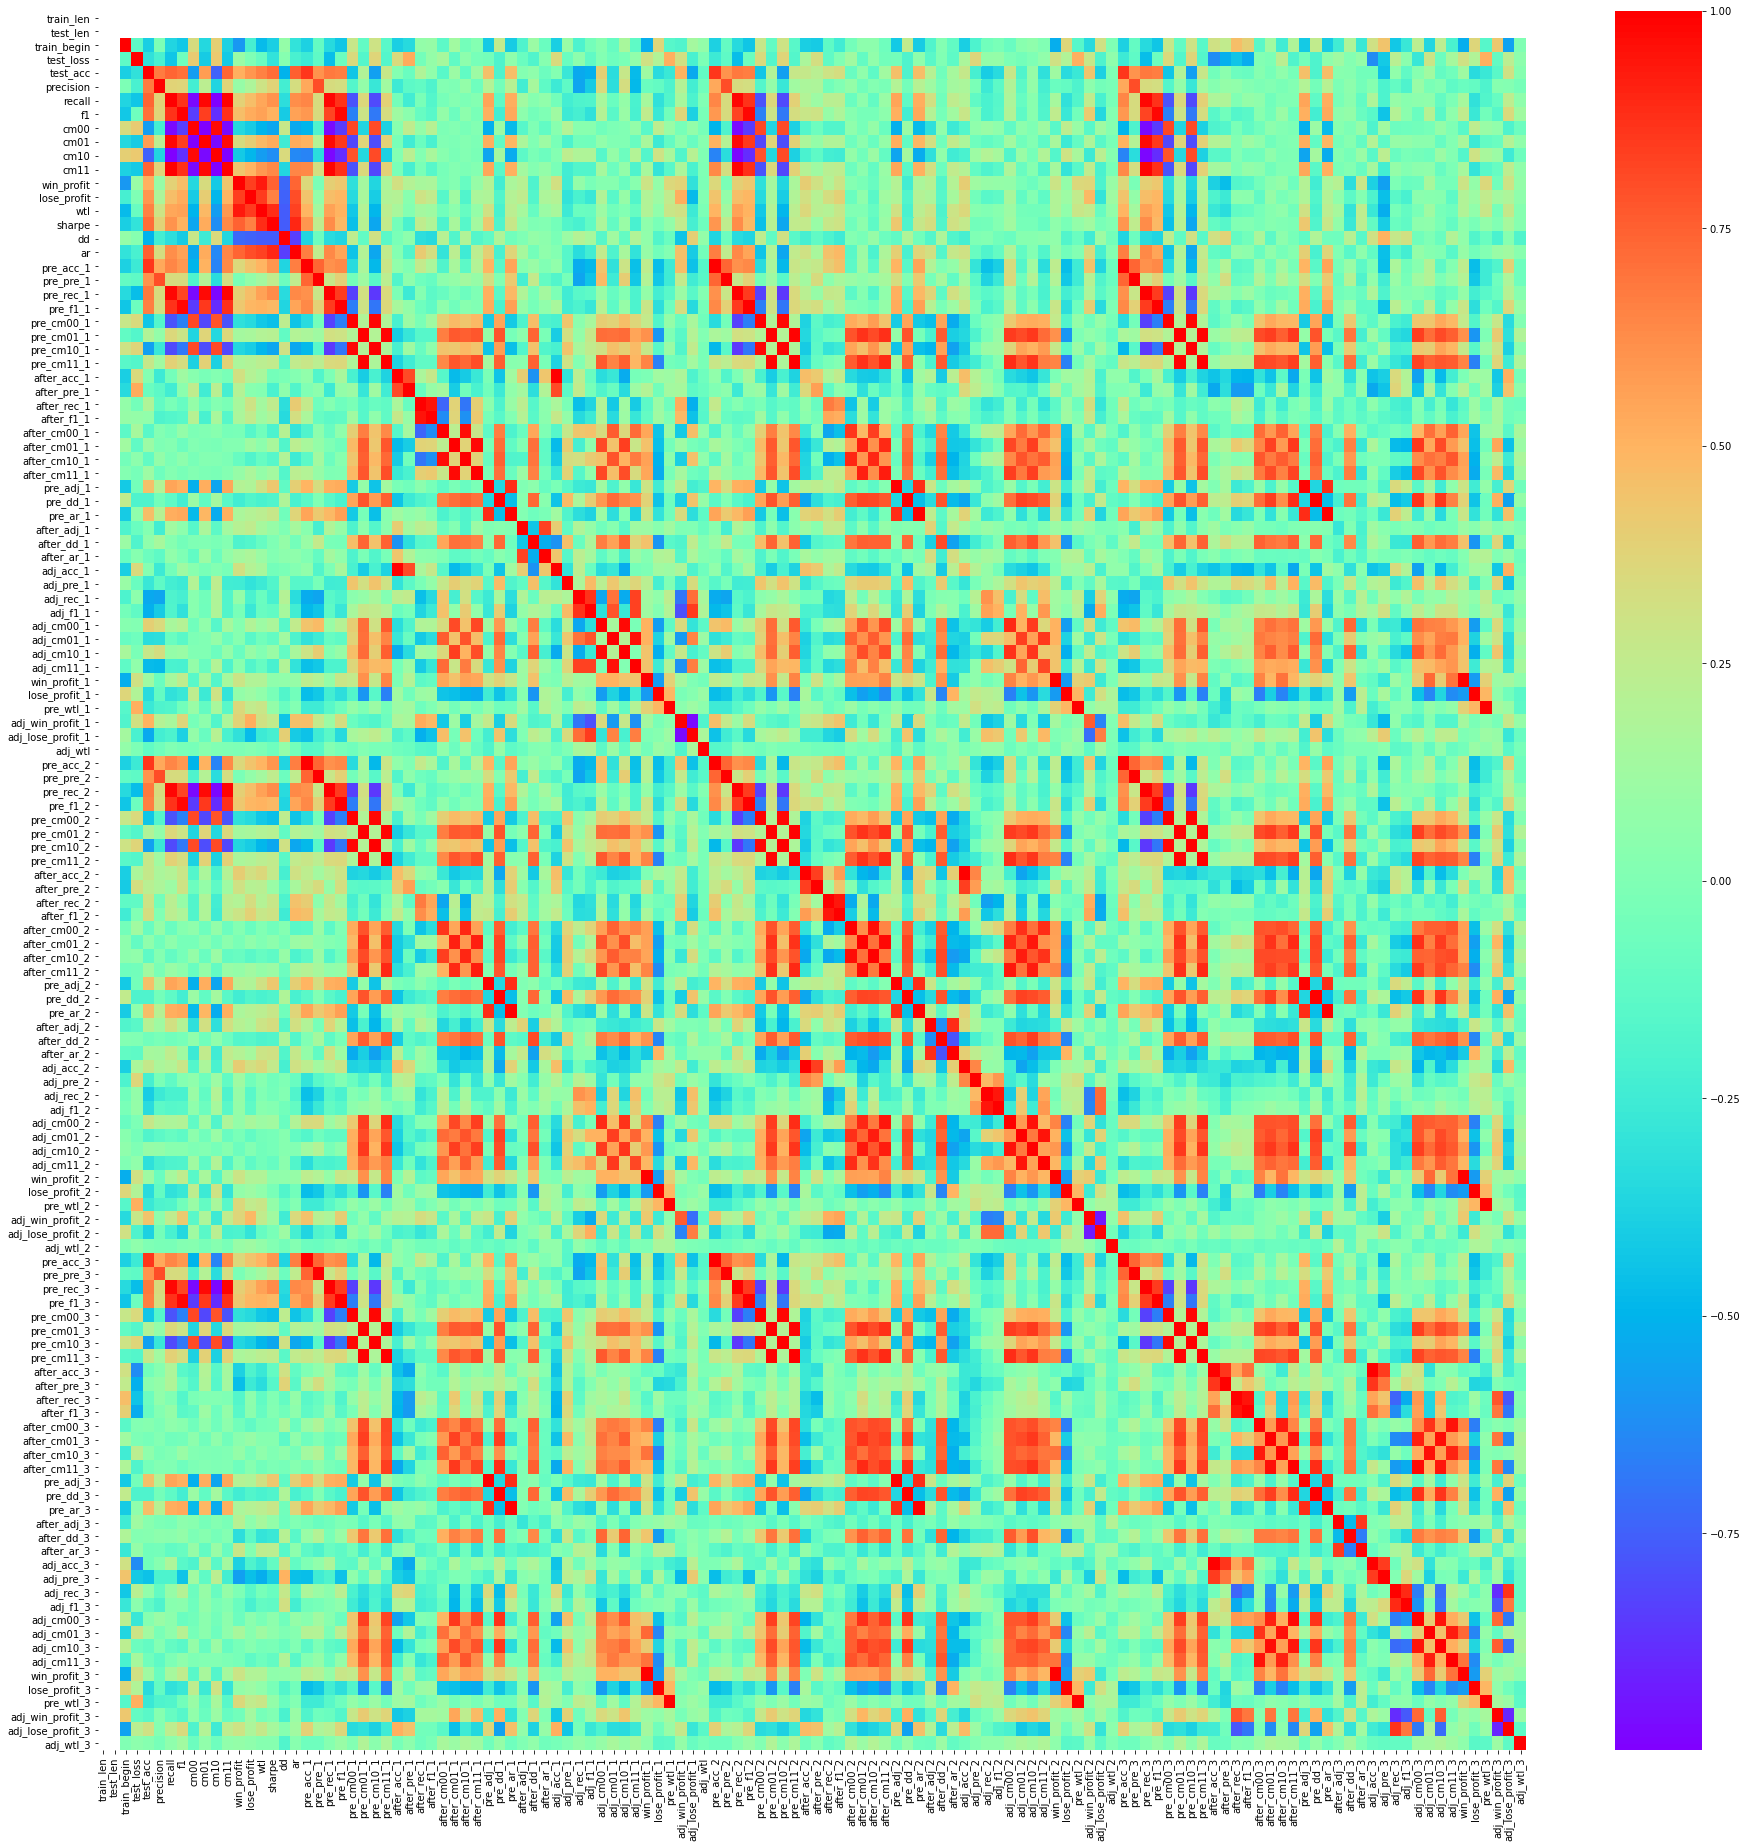

In [84]:

plt.figure(figsize=(32,32))
sns.heatmap(corr,annot=False,cmap='rainbow')
plt.xticks(rotation=90)
plt.show()

In [20]:
grouped = top_30.groupby(['sample_len','p1','p2','epochs','batch_size','weighted','fit_window']).mean()

In [75]:
grouped[['test_acc','precision','recall','f1']].sort_values('f1',ascending=False)

test_acc  precision  \
sample_len p1  p2  epochs batch_size weighted fit_window                        
120        192 192 30     200        True     200         0.529667   0.531572   
                                     False    100         0.529667   0.531572   
                                     True     150         0.529667   0.531572   
                                              100         0.529667   0.531572   
                                     False    200         0.529667   0.531572   
...                                                            ...        ...   
6          192 192 30     100        True     100         0.504857   0.506443   
                                     False    200         0.504857   0.506443   
                                              150         0.504857   0.506443   
                                              100         0.504857   0.506443   
                                     True     200         0.504857   0.506443   

                                                            recall        f1  
sample_len p1  p2  epochs batch_size weighted fit_window                      
120        192 192 30     200        True     200         0.915186  0.670954  
                                     False    100         0.915186  0.670954  
                                     True     150         0.915186  0.670954  
                                              100         0.915186  0.670954  
                                     False    200         0.915186  0.670954  
...                                                            ...       ...  
6          192 192 30     100        True     100         0.711191  0.569676  
                                     False    200         0.711191  0.569676  
                                              150         0.711191  0.569676  
                                              100         0.711191  0.569676  
                                     True     200         0.711191  0.569676  

[180 rows x 4 columns]

In [63]:
grouped.loc[grouped['pre_dd_1'] > grouped['after_dd_2']][['pre_dd_1','after_dd_2']]

pre_dd_1  \
sample_len p1  p2  epochs batch_size weighted fit_window              
6          48  96  30     200        False    100         21.136813   
                                              150         19.099238   
                                              200         13.786264   
                                     True     100         21.136813   
                                              150         19.099238   
...                                                             ...   
60         192 48  30     200        True     150         18.555522   
                                              200         12.352685   
120        96  192 60     200        False    100         21.317640   
           192 192 30     200        False    100         18.567361   
                                     True     100         18.567361   

                                                          after_dd_2  
sample_len p1  p2  epochs batch_size weighted fit_window              
6          48  96  30     200        False    100          15.229300  
                                              150          11.744096  
                                              200           9.210417  
                                     True     100          19.348662  
                                              150          14.245798  
...                                                              ...  
60         192 48  30     200        True     150          17.205833  
                                              200          11.937142  
120        96  192 60     200        False    100          19.959277  
           192 192 30     200        False    100          17.007523  
                                     True     100          16.677014  

[156 rows x 2 columns]

In [64]:
grouped[['adj_acc_1','adj_acc_2','adj_acc_3']].mean()

adj_acc_1    0.511182
adj_acc_2    0.515707
adj_acc_3    0.501983
dtype: float64

In [65]:
grouped[['after_acc_1','after_acc_2','after_acc_3']].mean()

after_acc_1    0.511182
after_acc_2    0.515707
after_acc_3    0.501983
dtype: float64

In [41]:
grouped.loc[grouped['pre_f1_1'] > grouped['after_f1_1']]

train_len  test_len  \
sample_len p1  p2  epochs batch_size weighted fit_window                        
6          48  96  30     200        False    100            1500.0     500.0   
                                              150            1500.0     500.0   
                                              200            1500.0     500.0   
                                     True     100            1500.0     500.0   
                                              150            1500.0     500.0   
...                                                             ...       ...   
120        192 192 30     200        False    150            1500.0     500.0   
                                              200            1500.0     500.0   
                                     True     100            1500.0     500.0   
                                              150            1500.0     500.0   
                                              200            1500.0     500.0   

                                                          train_begin  \
sample_len p1  p2  epochs batch_size weighted fit_window                
6          48  96  30     200        False    100              1506.0   
                                              150              1506.0   
                                              200              1506.0   
                                     True     100              1506.0   
                                              150              1506.0   
...                                                               ...   
120        192 192 30     200        False    150              1370.0   
                                              200              1370.0   
                                     True     100              1370.0   
                                              150              1370.0   
                                              200              1370.0   

                                                          test_loss  test_acc  \
sample_len p1  p2  epochs batch_size weighted fit_window                        
6          48  96  30     200        False    100          0.695113  0.522000   
                                              150          0.695113  0.522000   
                                              200          0.695113  0.522000   
                                     True     100          0.695113  0.522000   
                                              150          0.695113  0.522000   
...                                                             ...       ...   
120        192 192 30     200        False    150          0.695375  0.529667   
                                              200          0.695375  0.529667   
                                     True     100          0.695375  0.529667   
                                              150          0.695375  0.529667   
                                              200          0.695375  0.529667   

                                                          precision    recall  \
sample_len p1  p2  epochs batch_size weighted fit_window                        
6          48  96  30     200        False    100          0.536978  0.788807   
                                              150          0.536978  0.788807   
                                              200          0.536978  0.788807   
                                     True     100          0.536978  0.788807   
                                              150          0.536978  0.788807   
...                                                             ...       ...   
120        192 192 30     200        False    150          0.531572  0.915186   
                                              200          0.531572  0.915186   
                                     True     100          0.531572  0.915186   
                                              150          0.531572  0.915186   
                            

In [34]:
(grouped['pre_acc_1'] < grouped['after_acc_3']).value_counts(True)

False    0.844444
True     0.155556
dtype: float64